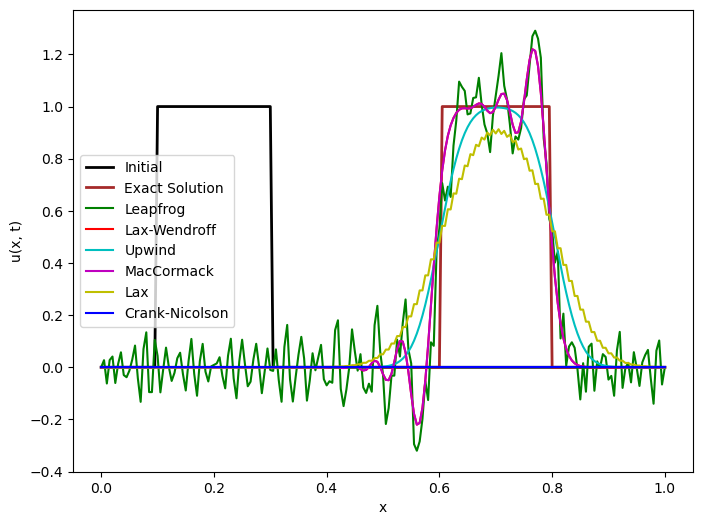

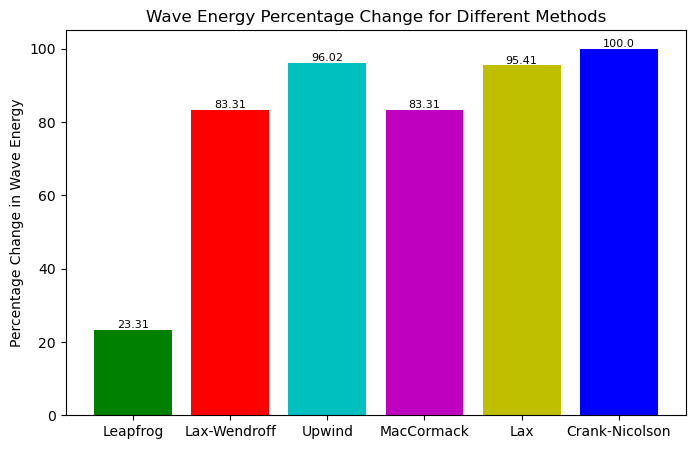

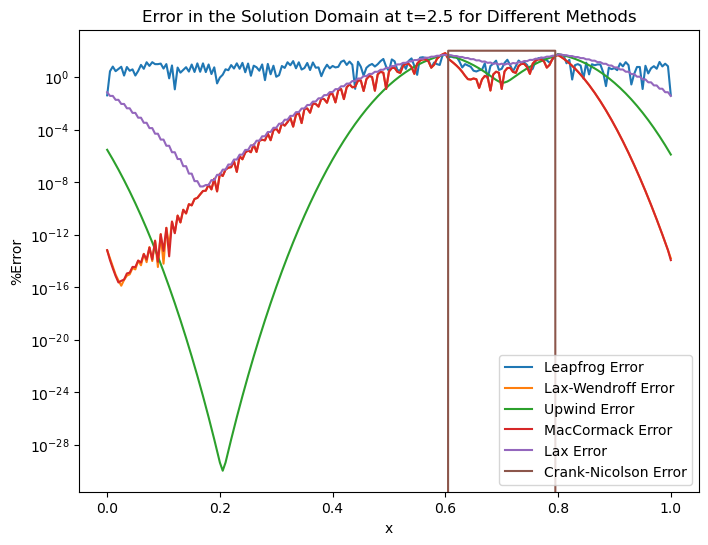

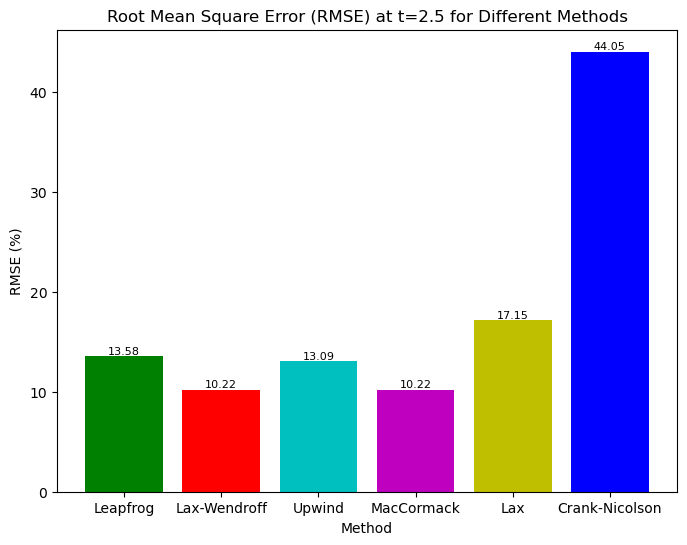

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
a = 0.2
L = 1.0
N = (200)+1
dx = L / (N - 1)
dt = 0.5 * dx / np.abs(a)
x = np.linspace(0, L, N)
T = 2.5

# Define initial condition

#def u0(x):
#    return np.sin(2 * np.pi * x)

#def u0(x):
#    return np.sin(100 * np.pi * x)

def u0(x):
    return np.piecewise(x, [x < 0.1, (0.1 <= x) & (x <= 0.3), x > 0.3], [0, 1, 0])


# Crank-Nicolson Scheme
def crank_nicolson_method(a, T):
    dt = 0.5 * dx / a
    u = u0(x + a * T)  # Initial condition at t = 0
    for t in np.arange(0, T, dt):
        u = crank_nicolson_method_update(u, a, dt, dx)

    return u

# Implement Crank-Nicolson discretization scheme
def crank_nicolson_method_update(u, a, dt, dx):
    lambd = a * dt / (2 * dx)
    N = len(u) - 1

    # Construct the tridiagonal matrix A
    A = np.diagflat([-lambd] * N, -1) + np.diagflat([1 + 2 * lambd] * (N + 1)) + np.diagflat([-lambd] * N, 1)

    # Construct the right-hand side vector b
    b = u.copy()
    b[:-1] += lambd * (u[1:] - u[:-1])
    b[1:] += lambd * (u[:-1] - u[1:])

    # Solve the system of equations
    u = np.linalg.solve(A, b)

    return u

# MacCormack Scheme
def macCormack_method(a, T):
    dt = 0.5 * dx / np.abs(a)
    u = u0(x)  # Initial condition at t = 0
    for t in np.arange(0, T, dt):
        u = macCormack_method_update(u, a, dt, dx)

    return u

# Implement MacCormack discretization scheme
def macCormack_method_update(u, a, dt, dx):
    u_tilde = u.copy()

    # Predictor step
    for i in range(1, N - 1):
        u_tilde[i] = u[i] - a * dt / dx * (u[i + 1] - u[i])

    # Corrector step
    for i in range(1, N - 1):
        u[i] = 0.5 * (u[i] + u_tilde[i] - a * dt / dx * (u_tilde[i] - u_tilde[i - 1]))

    # Apply periodic boundary conditions
    u[0] = u[-2]
    u[-1] = u[1]

    return u

# Leapfrog Scheme
def leapfrog_method(a, T):
    dt = dx / (2 * np.abs(a))  # Adjusted time step for stability
    u_previous = u0(x - 0.5 * dt * a)  # Initial condition at n-1/2
    u_current = u0(x)  # Initial condition at n
    for t in np.arange(0, T, dt):
        u_next = leapfrog_method_update(u_previous, u_current, a, dt, dx)
        u_previous, u_current = u_current, u_next

    return u_current

# Implement Leapfrog discretization scheme
def leapfrog_method_update(u_previous, u_current, a, dt, dx):
    u_next = np.zeros_like(u_current)
    alpha = a * dt / dx

    # Update interior points
    for i in range(1, N - 1):
        u_next[i] = u_previous[i] - alpha * (u_current[i + 1] - u_current[i - 1])

    # Apply periodic boundary conditions
    u_next[0] = u_previous[0] - alpha * (u_current[1] - u_current[-2])
    u_next[-1] = u_next[0]

    return u_next

# Lax Scheme
def lax_method(a, T):
    dt = 0.5 * dx / np.abs(a)  # Adjusted time step for stability
    u = u0(x)  # Initial condition at t = 0
    for t in np.arange(0, T, dt):
        u = lax_method_update(u, a, dt, dx)

    return u

# Implement Lax discretization scheme
def lax_method_update(u, a, dt, dx):
    u_new = np.zeros_like(u)
    alpha = a * dt / (2 * dx)

    for i in range(1, N - 1):
        u_new[i] = 0.5 * (u[i + 1] + u[i - 1]) - alpha * (u[i + 1] - u[i - 1])

    # Apply periodic boundary conditions
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]

    return u_new

# Lax-Wendroff Scheme
def lax_wendroff_method(a, T):
    dt = 0.5 * dx / a
    u = u0(x)  # Initial condition at t = 0
    for t in np.arange(0, T, dt):
        u = lax_wendroff_method_update(u, a, dt, dx)

    return u

# Implement Lax-Wendroff discretization scheme
def lax_wendroff_method_update(u, a, dt, dx):
    u_new = np.zeros_like(u)
    C = a * dt / dx
    for i in range(1, N - 1):
        u_new[i] = u[i] - 0.5 * C * (u[i + 1] - u[i - 1]) + 0.5 * C**2 * (u[i + 1] - 2 * u[i] + u[i - 1])

    # Apply periodic boundary conditions
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]

    return u_new

# Upwind Scheme
def upwind_method(a, T):
    dt = 0.5 * dx / a
    u = u0(x)  # Initial condition at t = 0
    for t in np.arange(0, T, dt):
        u = upwind_method_update(u, a, dt, dx)

    return u

# Implement upwind discretization scheme
def upwind_method_update(u, a, dt, dx):
    u_new = np.zeros_like(u)
    for i in range(1, N - 1):
        if a > 0:
            u_new[i] = u[i] - a * dt / dx * (u[i] - u[i - 1])
        else:
            u_new[i] = u[i] - a * dt / dx * (u[i + 1] - u[i])

    # Apply periodic boundary conditions
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]

    return u_new

# Exact Solution
def exact_solution(a, T):
    return u0(x - a * T)

# Calculate wave energy
def wave_energy(u, dx):
    return np.sum(0.5 * (u[1:] - u[:-1])**2) * dx

# Calculate errors with exact solution
def error_calculator(u1, u2):
    return abs((u1 - u2)*100)

# Plotting
plt.figure(figsize=(8, 6))

# Initial condition
plt.plot(x, u0(x), label="Initial", color='k', linewidth=2)

# Exact Solution
u_exact = exact_solution(a, T)
plt.plot(x, u_exact, label="Exact Solution", color='brown', linewidth=2)

# Leapfrog
u_leapfrog = leapfrog_method(a, T)
plt.plot(x, u_leapfrog, label="Leapfrog", color='g')

# Lax-Wendroff
u_lax_wendroff = lax_wendroff_method(a, T)
plt.plot(x, u_lax_wendroff, label="Lax-Wendroff", color='r')

# Upwind
u_upwind = upwind_method(a, T)
plt.plot(x, u_upwind, label="Upwind", color='c')

# MacCormack
u_macCormack = macCormack_method(a, T)
plt.plot(x, u_macCormack, label="MacCormack", color='m')

# Lax
u_lax = lax_method(a, T)
plt.plot(x, u_lax, label="Lax", color='y')

# Crank-Nicolson
u_crank_nicolson = crank_nicolson_method(a, T)
plt.plot(x, u_crank_nicolson, label="Crank-Nicolson", color='b')

plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.legend()

# Calculate and display wave energy percentage change
E_initial_exact = wave_energy(u0(x), dx) / N
E_final_exact = wave_energy(u_exact, dx) / N
percentage_change_exact = abs(((E_final_exact - E_initial_exact) / E_initial_exact)) * 100
#print("Wave Energy Percentage Change (Exact Solution):", round(percentage_change_exact, 2), "%")

# Calculate and display wave energy percentage change for each method
methods = [
    ("Leapfrog", u_leapfrog),
    ("Lax-Wendroff", u_lax_wendroff),
    ("Upwind", u_upwind),
    ("MacCormack", u_macCormack),
    ("Lax", u_lax),
    ("Crank-Nicolson", u_crank_nicolson),
]

percentage_changes = []
for method_name, u_method in methods:
    E_initial_method = wave_energy(u0(x), dx) / N
    E_final_method = wave_energy(u_method, dx) / N
    percentage_change_method = abs(((E_final_method - E_initial_method) / E_initial_method)) * 100
    percentage_changes.append(percentage_change_method)
#    print(f"Wave Energy Percentage Change ({method_name}):", round(percentage_change_method, 2), "%")

# Calculate errors for each method
errors = []
for method_name, u_method in methods:
    # Calculate errors with exact solution
    error = error_calculator(u_exact, u_method)
    errors.append(error)

# Calculate and display RMSE for each method
rmse_values = []
for method_name, u_method in methods:
    u_exact_t = exact_solution(a, T)
    error_array = error_calculator(u_exact_t, u_method)
    rmse = np.sqrt(np.mean(error_array**2))  # Calculate RMSE
    rmse_values.append(rmse)

# Bar chart for wave energy percentage changes with text labels
plt.figure(figsize=(8, 5))
bars = plt.bar([method_name for method_name, _ in methods], percentage_changes, color=['g', 'r', 'c', 'm', 'y', 'b'])
plt.ylabel("Percentage Change in Wave Energy")
plt.title("Wave Energy Percentage Change for Different Methods")
# Add text labels on top of each bar
for bar, percentage_change in zip(bars, percentage_changes):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(percentage_change, 2), ha='center', va='bottom', color='black', fontsize=8)
plt.show()

# Plotting errors
plt.figure(figsize=(8, 6))
for i, (method_name, _) in enumerate(methods):
    plt.plot(x, errors[i], label=f"{method_name} Error")
plt.yscale('log')
plt.xlabel("x")
plt.ylabel("%Error")
plt.legend()
plt.title("Error in the Solution Domain at t=2.5 for Different Methods")
plt.show()

# Bar chart for RMSE with text labels
plt.figure(figsize=(8, 6))
bars = plt.bar([method_name for method_name, _ in methods], rmse_values, color=['g', 'r', 'c', 'm', 'y', 'b'])
plt.xlabel("Method")
plt.ylabel("RMSE (%)")
plt.title("Root Mean Square Error (RMSE) at t=2.5 for Different Methods")
# Add text labels on top of each bar
for bar, rmse_val in zip(bars, rmse_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(rmse_val, 2), ha='center', va='bottom', color='black', fontsize=8)
plt.show()
